In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving BostonHousing.csv to BostonHousing.csv


In [ ]:
boston_df = pd.read_csv("BostonHousing.csv")
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


**Exploratory Data Analysis**

In [ ]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
boston_df.isna().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,5
AGE,0
DIS,0
RAD,0
TAX,0


In [ ]:
#Remove missing observations
boston_df= boston_df.dropna()

In [ ]:
## Find correlation coefficients
corr_boston = boston_df.corr().round(2)

<Axes: >

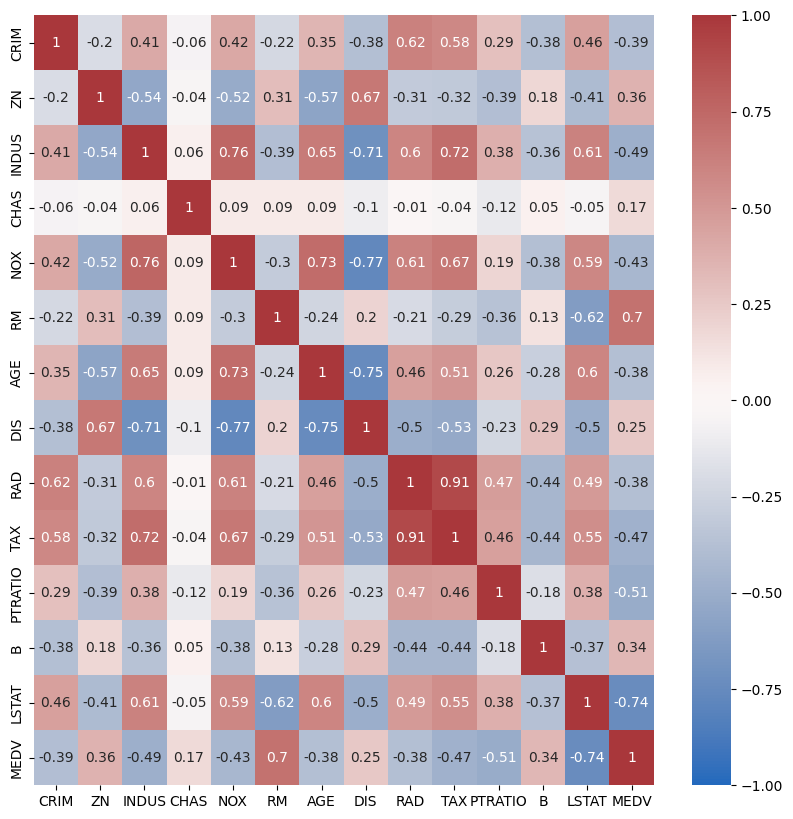

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data=corr_boston, vmin=-1, vmax=1, center=0, annot=True, cmap='vlag')

In [ ]:
abs(corr_boston.MEDV) > 0.5

,MEDV
CRIM,False
ZN,False
INDUS,False
CHAS,False
NOX,False
RM,True
AGE,False
DIS,False
RAD,False
TAX,False


In [ ]:
print(boston_df.corr().abs().nlargest(3,'MEDV').index)

Index(['MEDV', 'LSTAT', 'RM'], dtype='object')


The top predictive variables to predict `MEDV` (median value of homes) are `LSAT` and `RM` which are the %age of lower status and number of rows respectively.

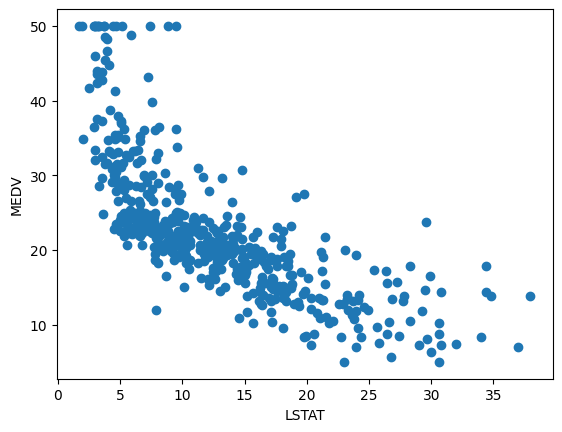

In [ ]:
## Visualize variables as scatterplot
plt.scatter(x=boston_df['LSTAT'], y=boston_df['MEDV'])
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

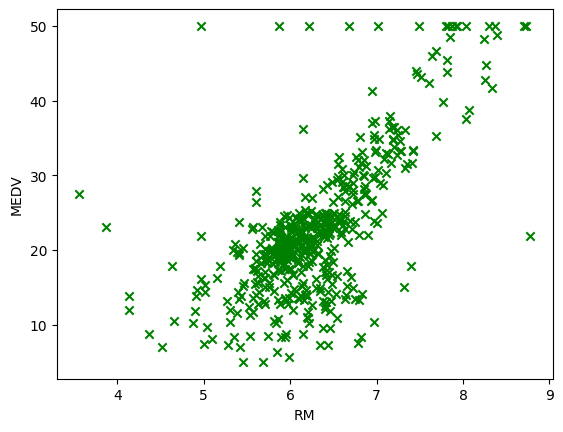

In [ ]:
plt.scatter(x=boston_df['RM'], y=boston_df['MEDV'], marker= 'x', c='Green')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

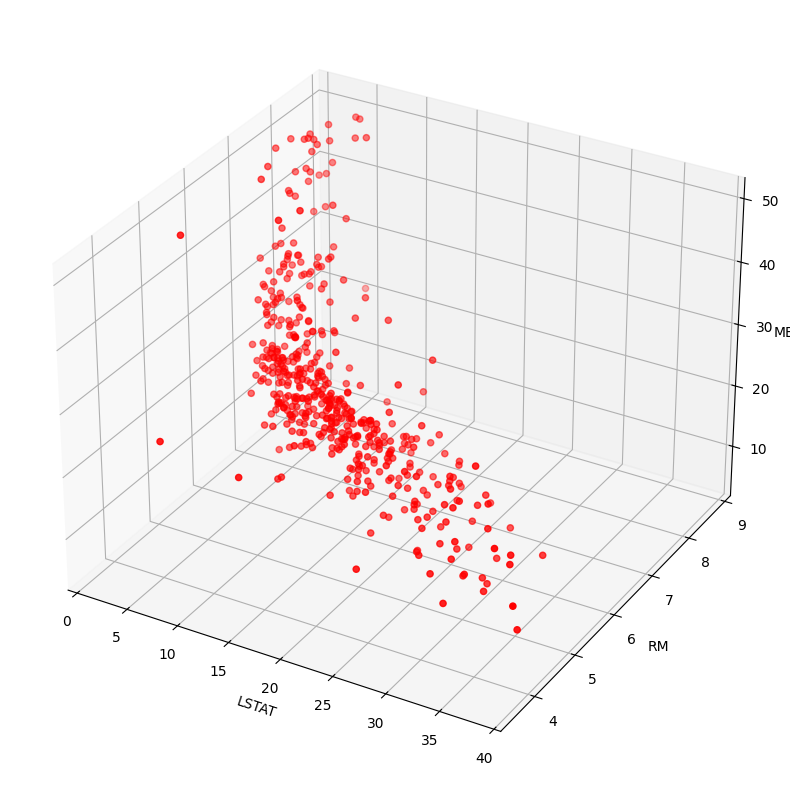

In [ ]:
## Make a 3D Scatterplot
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111, projection='3d')
ax.scatter(boston_df['LSTAT'], boston_df['RM'], boston_df['MEDV'], c='Red')

ax.set_xlabel('LSTAT')
ax.set_ylabel('RM')
ax.set_zlabel('MEDV')
plt.show()

**Train the Model**

In [ ]:
## Define the features
x= pd.DataFrame(np.c_[boston_df['LSTAT'],boston_df['RM']], columns=['LSTAT','RM'])
x.head()

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147


In [ ]:
# Define the target-MEDV
y= boston_df['MEDV']
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [ ]:
#Create training and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.25, random_state=5)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(375, 2) (126, 2) (375,) (126,)


In [ ]:
##Create a model
from sklearn.linear_model import LinearRegression

housing_model= LinearRegression()
housing_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
print(housing_model.coef_)
print(housing_model.intercept_)

[-0.6433015   4.50862125]
2.5394626212642244


In [ ]:
##Evaluate the model
price_pred= housing_model.predict(x_test)

print('R-squared: %.4f' % housing_model.score(x_test,y_test))

R-squared: 0.7066


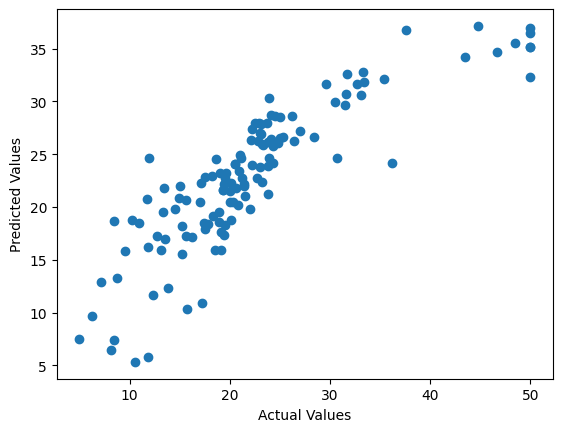

In [ ]:
##Visualize predicted & actual values
plt.scatter( x=y_test, y=price_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [ ]:
#Calculating Mean-Squared Error
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error(y_test, price_pred)
print('MSE: %.4f' % MSE)

MSE: 27.3531


The MSE of 27.4 is acceptable for a basic training model but there is still room to improve the model.